In [1]:
import pandas as pd
import xarray as xr
import requests

In [2]:
#Generates link to csv download of wind report on given date. Date format "yymmdd"
def generate_link(date):
    return f'https://www.spc.noaa.gov/climo/reports/{date}_rpts_wind.csv'

In [3]:
#Gets wind report on given date as a pandas dataframe
def get_wind_report(date):
    df = request_wind_report_df(date)    
    df = add_datetime(df, date)
    return df

def request_wind_report_df(date):
    #Actual request
    link = generate_link(date)
    data = requests.get(link)
    #Turns csv string into dataFrame
    csv_string = data.text
    data = [row.split(',') for row in csv_string.split('\n')]
    data.pop(-1)
    columns = data.pop(0)
    data.pop(0)
    #Returns dataframe 
    df = pd.DataFrame(data, columns=columns)
    return df

def add_datetime(df, date):
    #Hardcoded
    day = date[4] + date[5]
    time = df["Time"]
    datetime = f'2023-05-{day}'
    #Adds date time with correct string format
    df["datetime"] = [pd.Timestamp(f'{datetime} {t}') for t in time]
    df['datetime'] = pd.to_datetime(df["datetime"])
    #Removes Time column
    df.drop(columns=["Time"], inplace=True)
    return df 

In [4]:
get_wind_report("230531")

,Speed,Location,County,State,Lat,Lon,Comments,datetime
0,60,Tunerville,Deuel,SD,44.89,-96.68,Mesonet station 291 4N Altamont (SDDOT). (ABR),2023-05-31 18:51:00
1,UNK,1 N Yorkville,Kendall,IL,41.65,-88.45,Pictures of large tree limbs downed at multipl...,2023-05-31 20:07:00
2,60,3 SW Dalhart,Hartley,TX,36.02,-102.55,(AMA),2023-05-31 20:16:00
3,61,8.9 WNW St. Charles,Kane,IL,41.96,-88.47,Also approx 0.5 inch hail. (LOT),2023-05-31 20:45:00
4,77,11 NNW Slash Ranch,Loving,TX,31.98,-103.67,Mesonet station FW9691 Mentone. (MAF),2023-05-31 21:00:00
5,60,3 SE Dumas,Moore,TX,35.83,-101.92,(AMA),2023-05-31 21:16:00
6,59,9 NNE Sunray,Sherman,TX,36.14,-101.78,(AMA),2023-05-31 21:17:00
7,65,19 WNW Jal,Lea,NM,32.19,-103.51,Mesonet station FW9690 Jal. (MAF),2023-05-31 21:30:00
8,58,2 E Goodwell,Texas,OK,36.6,-101.6,(AMA),2023-05-31 21:55:00
9,61,3 NW Fruitvale,Mesa,CO,39.12,-108.52,ASOS station KGJT Grand Junction Rgnl AP. (GJT),2023-05-31 21:55:00


In [6]:
#Returns pandas dataframe with wind reports for month of may
def get_may_weather_reports():    
    i = 0
    for date in generate_dates():
        df = get_wind_report(date)
        if i == 0:
            big_df = df
            i += 1
        else :
            big_df = pd.concat([big_df, df])
    big_df.reset_index(inplace=True)
    return big_df

#Generates dates in format "yymmdd"
def generate_dates():
    dates = []
    for i in range(8, 32):
        dates.append("2305" + (f"{i}" if i >9 else f'0{i}'))
    return dates

In [7]:
report_data = get_may_weather_reports()
report_data.iloc[0]

index                                                       0
Speed                                                     UNK
Location                                     4 NNW BEVIL OAKS
County                                                 HARDIN
State                                                      TX
Lat                                                     30.22
Lon                                                    -94.29
Comments    HARDIN 911 REPORTS POSSIBLE TORNADO TOUCHED DO...
datetime                                  2023-05-08 20:10:00
Name: 0, dtype: object

In [8]:
r = report_data[report_data["Lat"] == "34.82"]
r.iloc[0]

index                                                      11
Speed                                                     UNK
Location                                                GRADY
County                                                  CURRY
State                                                      NM
Lat                                                     34.82
Lon                                                   -103.32
Comments    NORTHSIDE WINDOWS OF BAPTIST CHURCH KNOCKED OU...
datetime                                  2023-05-24 01:10:00
Name: 799, dtype: object

In [5]:
import cartopy.crs as ccrs


In [196]:
#Gets initialization hour for 
def get_initialization_hour(storm_report, forecast_hour):
    hour = storm_report["datetime"].hour
    init_hour = (hour - forecast_hour)%24
    initialization_hour = f'0{init_hour}' if init_hour < 10 else f'{init_hour}'
    return initialization_hour

#Inputs storm_report row and the forecast hour
#Outputs xarray dataset with model forecast
def fetch_model_output(storm_report, forecast_hour):
    st_month = storm_report["datetime"].month
    st_year = storm_report["datetime"].year
    st_day = storm_report["datetime"].day
    st_hour = storm_report["datetime"].hour
    
    date_time= f'{st_year}-{st_month}-{st_day}'
    initialization_hour = get_initialization_hour(storm_report, forecast_hour)
    
    return get_file_from_store(date_time, initialization_hour, forecast_hour)




In [197]:
import os
import xarray as xr
def make_model_file_name(initialization_hour, forecast_hour):
    print(initialization_hour)
    file_name = f'rrfs.t{initialization_hour}z.natlev.f00{forecast_hour}.conus_3km.grib2'
    return file_name

def get_file_from_store(date_time, initialization_hour, forecast_hour):
    init_hour_str = str(initializatioxn_hour)
    f_hour_str = str(forecast_hour)
    #TODO: Figure out how to convert this to string
    date_time_str = date_time
    #Checks if file is in date time file folder
    if date_time_str in os.listdir("./model_output"):
        #Check if folder for model date exists
        if init_hour_str in os.listdir(f"./model_output/{date_time_str}"):
            file_name = make_model_file_name(initialization_hour,forecast_hour)
            if file_name in os.listdir(f"./model_output/{date_time_str}/{init_hour_str}"):
                #If file has been downloaded, return dataset
                return xr.open_dataset(f"./model_output/{date_time_str}/{init_hour_str}/{file_name}", engine='pynio')
            else :
                #TODO: 
                #Forecast time has not yet been used
                #Fetch file
                #return xarray dataset
                raise Exception("Download model file")
                return 
        else :
            #TODO:
            #Model output with that initialization hour has not been used yet
            #Create folder for initialization hour 
            #Fetch file from s3 bucket and put in folder
            #Return xarray dataset 
            raise Exception("Download model file")
            return 
    #If file is not in date time file folder 
    else :
        #TODO:
        #Model out with for that date has not been used yet 
        #Create folder for date time object
        #Create folder for initialization hour
        #Fetch file from s3 bucket and put in folder 
        #Return xarray dataset
        raise Exception("Download model file")
        return
            
    return 


#TODO: Implement
def create_folder_structure(level, date_time, ):
    if level == 'd':
        os.makedir(f"./model_output/{date_time}")

#TODO: Implement once credentials are figured out
def fetch_model_data(file_name):
    #Use s3 api to download file from bucket
    return 


In [193]:
get_file_from_store('2023-05-24', 19, 6)

19


ValueError: unrecognized engine pynio must be one of: ['scipy', 'store']

In [90]:
#Model stuff

In [2]:
path = 'model_output/2023-05-24/19/rrfs.t19z.natlev.f006.conus_3km.grib2'
ds = xr.open_dataset(path, engine='pynio')

ValueError: unrecognized engine pynio must be one of: ['store']

In [3]:
xr.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
python-bits: 64
OS: Linux
OS-release: 5.15.0-72-generic
machine: x86_64
processor: x86_64
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: ('en_US', 'UTF-8')
libhdf5: 1.10.6
libnetcdf: None

xarray: 0.20.1
pandas: 1.2.4
numpy: 1.24.3
scipy: 1.6.2
netCDF4: None
pydap: None
h5netcdf: None
h5py: 3.7.0
Nio: None
zarr: None
cftime: None
nc_time_axis: None
PseudoNetCDF: None
rasterio: None
cfgrib: None
iris: None
bottleneck: 1.3.2
dask: 2021.04.0
distributed: 2021.04.1
matplotlib: 3.3.4
cartopy: 0.21.1
seaborn: None
numbagg: None
fsspec: 2023.5.0
cupy: None
pint: None
sparse: None
setuptools: 67.7.2
pip: 23.1.2
conda: 23.5.0
pytest: 7.3.1
IPython: 8.4.0
sphinx: 7.0.1


/home/andres/anaconda3/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [4]:
ds.MAXUW_P8_L103_GLC0_max

AttributeError: 'Dataset' object has no attribute 'MAXUW_P8_L103_GLC0_max'

In [7]:
ds.MAXUW_P8_L103_GLC0_max1h

<xarray.DataArray 'MAXUW_P8_L103_GLC0_max1h' (ygrid_0: 1059, xgrid_0: 1799)>
[1905141 values with dtype=float32]
Coordinates:
    gridlat_0  (ygrid_0, xgrid_0) float32 ...
    gridlon_0  (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: ygrid_0, xgrid_0
Attributes:
    center:                                         US National Weather Servi...
    production_status:                              Operational products
    long_name:                                      U component of hourly max...
    units:                                          m s-1
    grid_type:                                      Lambert Conformal can be ...
    parameter_discipline_and_category:              Meteorological products, ...
    parameter_template_discipline_category_number:  [  8   0   2 222]
    level_type:                                     Specified height level ab...
    level:                                          [10.]
    type_of_statistical_processing:                 Maximum
    statistical_process_duration:                   1 hours (ending at foreca...
    forecast_time:                                  [6]
    forecast_time_units:                            hours
    initial_time:                                   05/23/2023 (19:00)

In [11]:
ds['gridlon_0'][0,-1]

<xarray.DataArray 'gridlon_0' ()>
array(-72.28972, dtype=float32)
Coordinates:
    gridlat_0  float32 ...
    gridlon_0  float32 ...
Attributes:
    corners:    [-122.71953   -72.28972   -60.917194 -134.09547 ]
    long_name:  longitude
    grid_type:  Lambert Conformal (secant, tangent, conical or bipolar)
    units:      degrees_east
    Latin2:     [38.5]
    Latin1:     [38.5]
    Dy:         [3.]
    Dx:         [3.]
    Lov:        [262.5]
    Lo1:        [237.28047]
    La1:        [21.138123]

In [12]:
ds.coords['gridlat_0']

<xarray.DataArray 'gridlat_0' (ygrid_0: 1059, xgrid_0: 1799)>
[1905141 values with dtype=float32]
Coordinates:
    gridlat_0  (ygrid_0, xgrid_0) float32 ...
    gridlon_0  (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: ygrid_0, xgrid_0
Attributes:
    corners:    [21.138123 21.140547 47.842194 47.838623]
    long_name:  latitude
    grid_type:  Lambert Conformal (secant, tangent, conical or bipolar)
    units:      degrees_north
    Latin2:     [38.5]
    Latin1:     [38.5]
    Dy:         [3.]
    Dx:         [3.]
    Lov:        [262.5]
    Lo1:        [237.28047]
    La1:        [21.138123]

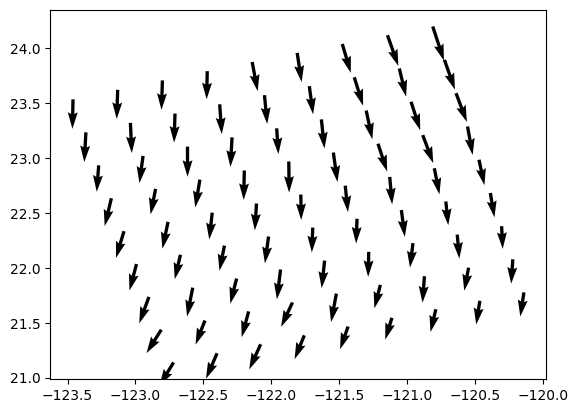

In [9]:
import matplotlib.pyplot as plt
import numpy as np

step = 12
X = ds.coords['gridlon_0'][0:100:step, 0:100:step]
Y = ds.coords['gridlat_0'][0:100:step, 0:100:step]
U = ds.MAXUW_P8_L103_GLC0_max1h[0:100:step, 0:100:step]
V = ds.MAXVW_P8_L103_GLC0_max1h[0:100:step, 0:100:step]

normalized_U = (U - U.min())/(U.max() - U.min())
normalized_V = (V - V.min())/(V.max() - V.min())
fig, ax = plt.subplots()

q = ax.quiver(X, Y, U, V)

plt.show()

In [224]:
U - U.mean()

<xarray.DataArray 'MAXUW_P8_L103_GLC0_max' ()>
array(0.27467656, dtype=float32)

In [12]:
#Subsetting the region 
X = ds.coords['gridlon_0'][1]
X

NameError: name 'ds' is not defined

In [231]:
a = np.array([1,2,3,4,5,6])

In [234]:
a[0:2]

array([1, 2])

In [17]:
import cartopy as ccrs


ModuleNotFoundError: No module named 'cartopy'

In [ ]:
!pip install cartopy

  Using cached Cartopy-0.20.3.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      Proj version 7.0.0 is installed, but cartopy requires at least version 8.0.0.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [11]:
step = 12
l = 650
offset = 200
y = 340
o = 125
X = ds.coords['gridlon_0'][y: y + o,l: l+offset]
Y = ds.coords['gridlat_0'][y: y + o, l:l + offset]
U = ds.UGRD_P0_L103_GLC0[y: y + o, l:l + offset]
V = ds.VGRD_P0_L103_GLC0[y: y + o,l:l+offset]

normalized_U = (U - U.min())/(U.max() - U.min())
normalized_V = (V - V.min())/(V.max() - V.min())
fig, ax = plt.subplots()

q = ax.quiver(X, Y, U, V)

plt.show()

NameError: name 'ds' is not defined

In [31]:
ds.coords['gridlon_0'][0,0]

<xarray.DataArray 'gridlon_0' ()>
array(-122.71953, dtype=float32)
Coordinates:
    gridlat_0  float32 ...
    gridlon_0  float32 ...
Attributes:
    corners:    [-122.71953   -72.28972   -60.917194 -134.09547 ]
    long_name:  longitude
    grid_type:  Lambert Conformal (secant, tangent, conical or bipolar)
    units:      degrees_east
    Latin2:     [38.5]
    Latin1:     [38.5]
    Dy:         [3.]
    Dx:         [3.]
    Lov:        [262.5]
    Lo1:        [237.28047]
    La1:        [21.138123]

In [69]:
for i in ds.data_vars:
    print(i,ds[i].attrs['long_name'])
    print("")

TMP_P0_L1_GLC0 Temperature

TMP_P0_L3_GLC0 Temperature

TMP_P0_L7_GLC0 Temperature

TMP_P0_L100_GLC0 Temperature

TMP_P0_L102_GLC0 Temperature

TMP_P0_L103_GLC0 Temperature

TMP_P0_L105_GLC0 Temperature

TMP_P0_2L108_GLC0 Temperature

POT_P0_L1_GLC0 Potential temperature

POT_P0_L103_GLC0 Potential temperature

POT_P0_2L108_GLC0 Potential temperature

DPT_P0_L103_GLC0 Dew point temperature

DPT_P0_2L108_GLC0 Dew point temperature

LHTFL_P0_L1_GLC0 Latent heat net flux

SHTFL_P0_L1_GLC0 Sensible heat net flux

SPFH_P0_L1_GLC0 Specific humidity

SPFH_P0_L100_GLC0 Specific humidity

SPFH_P0_L103_GLC0 Specific humidity

SPFH_P0_L105_GLC0 Specific humidity

SPFH_P0_2L108_GLC0 Specific humidity

RH_P0_L4_GLC0 Relative humidity

RH_P0_L100_GLC0 Relative humidity

RH_P0_L103_GLC0 Relative humidity

RH_P0_2L108_GLC0 Relative humidity

PWAT_P0_2L108_GLC0 Precipitable water

PWAT_P0_L200_GLC0 Precipitable water

PRATE_P0_L1_GLC0 Precipitation rate

SNOD_P0_L1_GLC0 Snow depth

WEASD_P0_L1_GLC0 Wat

In [76]:
ds['UGRD_P0_L103_GLC0'].attrs

{'center': 'US National Weather Service - NCEP (WMC)',
 'production_status': 'Operational products',
 'long_name': 'U-component of wind',
 'units': 'm s-1',
 'grid_type': 'Lambert Conformal can be secant or tangent, conical or bipolar',
 'parameter_discipline_and_category': 'Meteorological products, Momentum',
 'parameter_template_discipline_category_number': array([0, 0, 2, 2], dtype=int32),
 'level_type': 'Specified height level above ground (m)',
 'level': array([10.], dtype=float32),
 'forecast_time': array([6], dtype=int32),
 'forecast_time_units': 'hours',
 'initial_time': '05/23/2023 (19:00)'}

In [ ]:
UGRD_P0_L6_GLC0 U-component of wind

UGRD_P0_L7_GLC0 U-component of wind

UGRD_P0_L100_GLC0 U-component of wind

UGRD_P0_L102_GLC0 U-component of wind

UGRD_P0_L103_GLC0 U-component of wind

UGRD_P0_L105_GLC0 U-component of wind

UGRD_P0_2L108_GLC0

In [10]:
import cartopy

In [2]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature


def main():
    fig = plt.figure(figsize=[10, 5])
    print('aqui')
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(),
                          sharex=ax1, sharey=ax1)
    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)

    # Limit the map to -60 degrees latitude and below.
    ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)

    ax1.gridlines()
    ax2.gridlines()

    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.OCEAN)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax2.set_boundary(circle, transform=ax2.transAxes)


In [ ]:
main()